In [3]:
import shutil
shutil.copy2('/content/drive/My Drive/Dataset/Dataset.zip','.')

'./Dataset.zip'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from zipfile import ZipFile
fname='Dataset.zip'
with ZipFile(fname,'r') as zip:
  zip.extractall()
  print('done')


import os
os.mkdir('dataset')

done


In [5]:
shutil.move('covid','dataset')
shutil.move('normal','dataset')

os.chdir('dataset')
os.rename('covid','0')
os.rename('normal','1')
os.chdir('../')

In [6]:
folder1='dataset/0'
folder2='dataset/1'
import random
image_names1=os.listdir(folder1)
random.shuffle(image_names1)

image_names2=os.listdir(folder2)
random.shuffle(image_names2)

In [7]:
# import os
# import random
os.chdir('dataset')
if os.path.isdir('train/0/') is False:
  os.mkdir('train')
  os.mkdir('valid')
  os.mkdir('test')

  for i in range(0,2):
    shutil.move(f'{i}','train')
    os.mkdir(f'valid/{i}')
    os.mkdir(f'test/{i}')
    #move directory to train and make drictorys in valid and test
    #now we have total 180 images so we take 25 for validation and 25 for test and rest of it for trainnig purpose

    test_samples=random.sample(os.listdir(f'train/{i}'),25)
    for j in test_samples:
      shutil.move(f'train/{i}/{j}',f'test/{i}')

    valid_samples=random.sample(os.listdir(f'train/{i}'),25)
    for j in valid_samples:
      shutil.move(f'train/{i}/{j}',f'valid/{i}') 

In [8]:
os.chdir('../')

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image

In [10]:
train_datagen=image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    zoom_range=.2,
    shear_range=.2,
    horizontal_flip=True,
                                       )

test_datagen=image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
                                       )

valid_datagen=image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
                                       )

In [11]:
train_path='dataset/train'
valid_path='dataset/valid'
test_path='dataset/test'

In [12]:
train_gen=train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=32,
    classes=['0','1']
)

test_gen=test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=32,
    classes=['0','1']
)

valid_gen=valid_datagen.flow_from_directory(
    valid_path,
    target_size=(224,224),
    batch_size=32,
    classes=['0','1']
)

Found 260 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [46]:
model=Sequential()

model.add(Conv2D(64,padding='same',kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,padding='same',kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,padding='same',kernel_size=(3,3),activation='relu'))
model.add(Conv2D(128,padding='same',kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,padding='same',kernel_size=(3,3),activation='relu'))
model.add(Conv2D(256,padding='same',kernel_size=(3,3),activation='relu'))
model.add(Conv2D(256,padding='same',kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(512,padding='same',kernel_size=(3,3),activation='relu'))
model.add(Conv2D(512,padding='same',kernel_size=(3,3),activation='relu'))
model.add(Conv2D(512,padding='same',kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(512,padding='same',kernel_size=(3,3),activation='relu'))
model.add(Conv2D(512,padding='same',kernel_size=(3,3),activation='relu'))
model.add(Conv2D(512,padding='same',kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

ResourceExhaustedError: ignored

In [13]:
model=Sequential()

model.add(Conv2D(32,padding='same',kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(32,padding='same',kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,padding='same',kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,padding='same',kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,padding='same',kernel_size=(3,3),activation='relu'))
model.add(Conv2D(128,padding='same',kernel_size=(3,3),activation='relu'))
model.add(Conv2D(128,padding='same',kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(256,padding='same',kernel_size=(3,3),activation='relu'))
model.add(Conv2D(256,padding='same',kernel_size=(3,3),activation='relu'))
model.add(Conv2D(256,padding='same',kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

In [14]:
from tensorflow.keras.optimizers import Adam
model.compile(loss=keras.losses.categorical_crossentropy,optimizer="adam",metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 128)       7

In [16]:
model.fit(train_gen,validation_data=valid_gen,epochs=10,batch_size=32,verbose=2)

Epoch 1/10
9/9 - 10s - loss: 17.6484 - accuracy: 0.4808 - val_loss: 0.6608 - val_accuracy: 0.9200
Epoch 2/10
9/9 - 9s - loss: 0.7008 - accuracy: 0.6000 - val_loss: 0.5639 - val_accuracy: 0.9600
Epoch 3/10
9/9 - 9s - loss: 0.4802 - accuracy: 0.8692 - val_loss: 0.2468 - val_accuracy: 0.9400
Epoch 4/10
9/9 - 10s - loss: 0.2872 - accuracy: 0.8962 - val_loss: 0.1264 - val_accuracy: 0.9600
Epoch 5/10
9/9 - 9s - loss: 0.2227 - accuracy: 0.9308 - val_loss: 0.1343 - val_accuracy: 0.9400
Epoch 6/10
9/9 - 9s - loss: 0.1776 - accuracy: 0.9423 - val_loss: 0.0886 - val_accuracy: 0.9600
Epoch 7/10
9/9 - 9s - loss: 0.1166 - accuracy: 0.9577 - val_loss: 0.1094 - val_accuracy: 0.9600
Epoch 8/10
9/9 - 10s - loss: 0.2882 - accuracy: 0.9192 - val_loss: 0.1918 - val_accuracy: 0.9400
Epoch 9/10
9/9 - 9s - loss: 0.1423 - accuracy: 0.9346 - val_loss: 0.0773 - val_accuracy: 0.9600
Epoch 10/10
9/9 - 9s - loss: 0.2556 - accuracy: 0.9346 - val_loss: 0.1446 - val_accuracy: 0.9400


In [ ]:
# import shutil
# shutil.rmtree('1')

In [ ]:
# import tensorflow as tf
# tf.__version__

'2.3.0'

In [17]:
predictions=model.predict(test_gen)

In [18]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes,rotation=0)

  if normalize:
    cm=cm.astype('float')/am.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix,without normalization")
  
  print(cm)

  thresh=cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [19]:
from sklearn.metrics import confusion_matrix
import itertools
cm=confusion_matrix(y_true=test_gen.classes,y_pred=np.argmax(predictions,axis=-1))

Confusion matrix,without normalization
[[16  9]
 [ 7 18]]


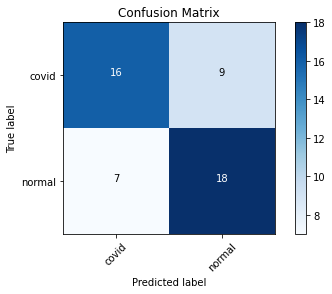

In [20]:
cm_plot_labels=['covid','normal']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')

In [21]:
model.save('covid_v1.h5')

In [22]:
shutil.copy2('covid_v1.h5','drive/My Drive/project files')

'drive/My Drive/project files/covid_v1.h5'